In [3]:
from Bio.Data import CodonTable
from Bio.SeqIO.QualityIO import FastqGeneralIterator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Task 1

I don't have enough imagination, sorry :(

In [34]:
class Student:
    def __init__(self, name, age=18, spec='Unknown'):
        self.name = name
        self.age = age
        self.spec = spec
        self.hp = 100
        self.knowledge = 0

    def __str__(self):
        return f'Student {self.name}\nAge: {self.age}\nSpecialization: {self.spec}'

    def drink_beer(self, n_pints=1):
        self.hp += n_pints * 10
        self.knowledge -= 10 * (2**(n_pints - 1))

    def to_study(self, n_hours=1):
        self.knowledge += n_hours * 10
        self.hp -= 10 * (2 ** (n_hours - 1))

    def check_status(self):
        if self.hp < 0:
            return 'Dead', [self.hp, self.knowledge]
        elif self.knowledge < 0:
            return f'Otchisleno', self.hp, self.knowledge
        else:
            return 'Lives and studies', self.hp, self.knowledge

#### Exapmle

In [38]:
student1 = Student('Tom', age=21, spec='Bioinformatic')
student2 = Student('Jerry', spec='Bioinformatic')
print(student1)
student1.check_status()

Student Tom
Age: 21
Specialization: Bioinformatic


('Lives and studies', 100, 0)

In [39]:
student1.to_study(3)
student1.drink_beer(2)
student1.check_status()

('Lives and studies', 80, 10)

In [40]:
student2.to_study(1)
student2.drink_beer(5)
student2.check_status()

('Otchisleno', 140, -150)

### Task 2

In [21]:
class RNA:
    codons = CodonTable.ambiguous_rna_by_id[1]
    permitted_rna_nucleotides = {'A', 'G', 'C', 'U'}

    def __init__(self, seq):
        self.seq = seq.upper()

    def translate(self, r_frame=0, to_stop=False):
        prot_chain = ''
        for nucl in range(r_frame, len(self.seq), 3):
            if len(self.seq[nucl:(nucl + 3)]) < 3:
                return prot_chain
            if self.seq[nucl:(nucl + 3)] in self.codons.stop_codons:
                if to_stop:
                    return prot_chain
                else:
                    prot_chain += '*'
            else:
                prot_chain += self.codons.forward_table[self.seq[nucl:(nucl + 3)]]
        return prot_chain
    
    def reverse_transcript(self):
        if len(set(self.seq).difference(self.permitted_rna_nucleotides)) == 0:
            return self.seq.replace('U', 'T')
        else:
            raise ValueError(f'Unknown nucleotides in the sequence: '
                             f'{set(self.seq).difference(self.permitted_rna_nucleotides)}')

#### Example

In [24]:
rna = RNA('AUGGCCAUUGUAAUGGGCCGCUgAAAGGGUGCCCGAUAG')
print(rna.reverse_transcript())
print(rna.translate())
print(rna.translate(to_stop=True))
print(rna.translate(r_frame=1))

ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
MAIVMGR*KGAR*
MAIVMGR
WPL*WAAERVPD


### Task 3

In [6]:
class PositiveSet(set):
    def __init__(self, lst):
        super().__init__([i for i in lst if i > 0])

    def add(self, other):
        if other > 0:
            super().add(other)

#### Example

In [26]:
a = PositiveSet([1, 3, 2, -17, 30, -162])
a

{1, 2, 3, 30}

In [27]:
a.add(27)
a.add(1)
a.add(-123)
a

{1, 2, 3, 27, 30}

### Task 4

Did not optimized for big fasq files

In [28]:
class FastQ:
    reads = []
    n_reads = 0

    def __init__(self, path):
        self.path = path
        with open(path) as in_handle:
            for read in FastqGeneralIterator(in_handle):
                self.reads.append(read[1])
                self.n_reads += 1

    def __str__(self):
        return f'FastQC file: {self.path}'

    def count_reads(self):
        return self.n_reads

    def len_histplot(self):
        len_array = np.zeros(self.n_reads)
        for i in range(self.n_reads):
            len_array[i] = len(self.reads[i])
        sns.histplot(len_array, discrete=True)
        plt.title('Read length distribution')
        plt.show()

    def gc_percentage(self):
        gc_content = np.zeros(self.n_reads)
        for i in range(self.n_reads):
            gc_content[i] = ((self.reads[i].count('G') + self.reads[i].count('C')) / len(self.reads[i]))
        return np.mean(gc_content) * 100

    def k_mers_freq_histplot(self, k=4):
        k_mers = {}
        for read in self.reads:
            for i in range(len(read) - k + 1):
                k_mer = read[i:(i + k)]
                if len(set(k_mer).difference(set('AGCT'))) != 0:
                    # because there are a lot of files with N or R nucleotides 
                    # that increase the number of variants until several hundred:
                    continue
                elif k_mer not in k_mers:
                    k_mers[k_mer] = 1
                else:
                    k_mers[k_mer] += 1
        plt.bar(x=k_mers.keys(), height=k_mers.values())
        plt.title(f'Distribution of k-mers (with k={k})')
        plt.show()

    def show_stats(self):
        # just run all methods
        print(f'Number of reads: {self.n_reads}\n'
              f'GC percentage: {round(self.gc_percentage(), 2)}%')
        self.len_histplot()
        self.k_mers_freq_histplot()

#### Example

In [29]:
fastq = FastQ('./1.fastq')
print(fastq)

FastQC file: ./1.fastq


Number of reads: 100000
GC percentage: 48.24%


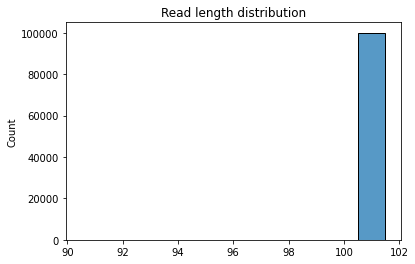

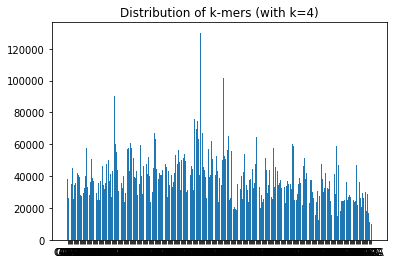

In [30]:
fastq.show_stats()